In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed training set

df = pd.read_csv('data/preprocessed_training_set.csv')

In [3]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [4]:
df.corr()['SalePrice'].sort_values().tail(10)

YearBuilt       0.523273
TotRmsAbvGrd    0.533779
FullBath        0.560881
1stFlrSF        0.605968
TotalBsmtSF     0.613905
GarageArea      0.623423
GarageCars      0.640473
GrLivArea       0.708618
OverallQual     0.791069
SalePrice       1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

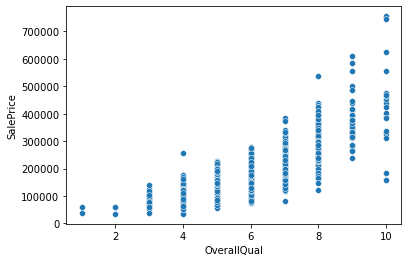

In [5]:
# Take into consideration first the feature with highest correlation with the output

sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

In [6]:
# Try to remove the outliers for Quality=4,7,8,9,10 using the IQR technique

overall_qual_list = [4, 7, 8, 9, 10]

for overall_qual in overall_qual_list:
    qual_sub_df = df[df['OverallQual'] == overall_qual]
    ser = qual_sub_df['SalePrice']
    IQR = ser.describe()['75%'] - ser.describe()['25%']
    lower_limit = ser.describe()['25%'] - 1.5*IQR
    upper_limit = ser.describe()['75%'] + 1.5*IQR
    
    df = df[~((df['SalePrice'] > upper_limit) & (df['OverallQual'] == overall_qual))]
    df = df[~((df['SalePrice'] < lower_limit) & (df['OverallQual'] == overall_qual))]

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

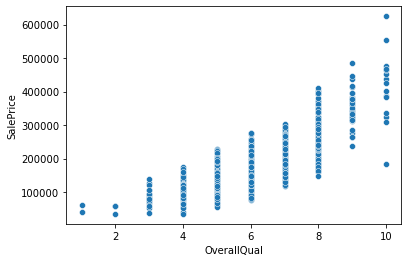

In [7]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

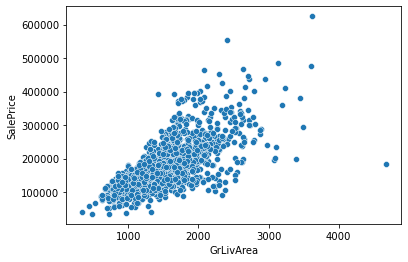

In [8]:
# Take into consideration the second highest correlated feature with the output

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

In [9]:
# We can see that the output increases linearly with GrLivArea, so we can remove the
# outlier having a low price wrt GrLivArea (> 4000)

df = df[~(df['GrLivArea'] > 4000)]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

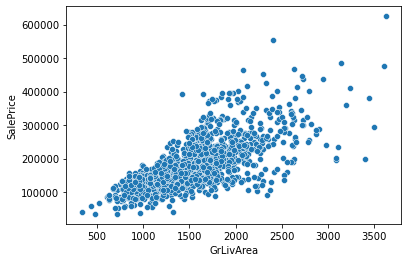

In [10]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

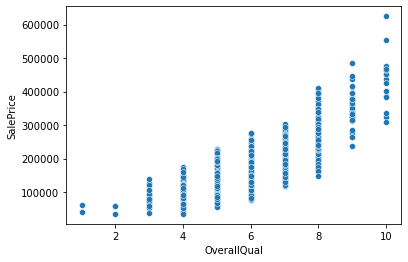

In [11]:
# Now the situation is better also for OverallQual=10

sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

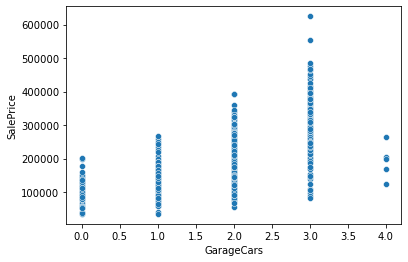

In [12]:
# Try to explore outliers for GarageCars

sns.scatterplot(x='GarageCars', y='SalePrice', data=df)

In [13]:
# Try to use IQR technique on GarageCars=2,3

garage_cars_list = [2,3]

for garage_cars in garage_cars_list:
    garage_cars_sub_df = df[df['GarageCars'] == garage_cars]
    ser = garage_cars_sub_df['SalePrice']
    IQR = ser.describe()['75%'] - ser.describe()['25%']
    lower_limit = ser.describe()['25%'] - 1.5*IQR
    upper_limit = ser.describe()['75%'] + 1.5*IQR
    
    df = df[~((df['SalePrice'] > upper_limit) & (df['GarageCars'] == garage_cars))]
    df = df[~((df['SalePrice'] < lower_limit) & (df['GarageCars'] == garage_cars))]

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

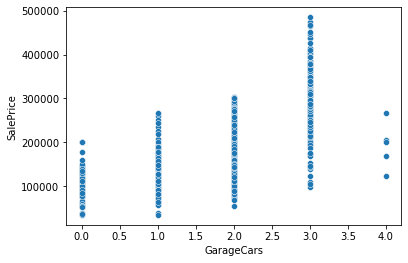

In [14]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

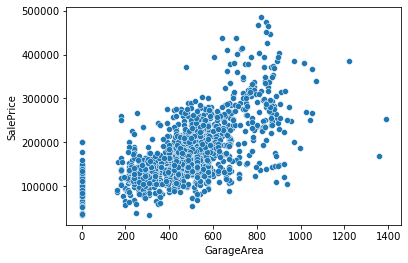

In [16]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)

In [18]:
# For the GarageArea, we have a situation similar to the GrLivArea

df[df['GarageArea'] > 1300]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
581,98.000000,12704,8,5,2008,2009,0,0,2042,2042,...,0,0,1,0,0,0,0,0,0,1
1190,70.083333,32463,4,4,1961,1975,1159,0,90,1249,...,0,0,0,0,1,0,0,0,1,0


In [19]:
df = df[~(df['GarageArea'] > 1300)]

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

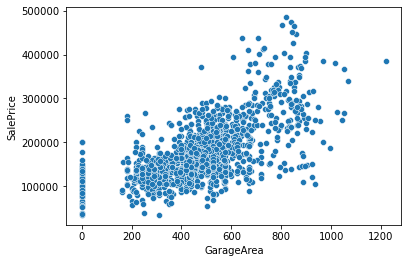

In [20]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

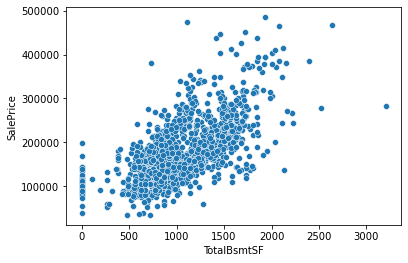

In [22]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

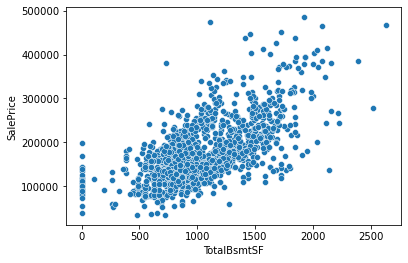

In [23]:
df = df[~(df['TotalBsmtSF'] > 3000)]
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

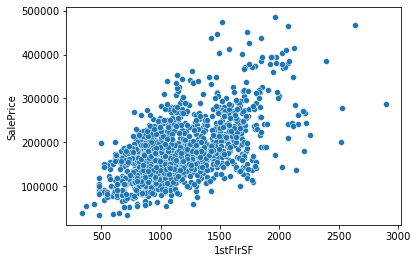

In [24]:
# Stopping here, no outliers in for this feature

sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)

In [25]:
# Save training set for next step

df.to_csv('training_set_without_outliers.csv', index=False)